In [1]:
# Import packages
import numpy as np
import pandas as pd
import math
import datetime
import os
import matplotlib.pyplot as plt
from collections import Counter
import statsmodels.api as sm
from scipy.stats import t
from sklearn.utils import check_array
from functools import reduce
import seaborn as sns
import warnings
import collections
from matplotlib.pylab import rcParams
warnings.simplefilter(action='ignore', category=Warning)
import seaborn as sns
sns.set()
import pickle
import altair as alt
from vega_datasets import data

alt.renderers.enable("browser")
alt.data_transformers.enable('vegafusion')

DataTransformerRegistry.enable('vegafusion')

In [2]:
# df = pd.read_csv('data/factors_1965.csv', parse_dates=['DATE'])

In [3]:
# with open('data/features_1965.pkl', 'wb') as f:
#     pickle.dump(df, f)

with open('data/features_1965.pkl', 'rb') as f:
    df = pickle.load(f)
    print(df.head())


   permno       DATE        mvel1      beta    betasq     chmom     dolvol  \
0   10145 1965-02-26   1498872.00  0.983510  0.967291  0.105988  11.546907   
1   10401 1965-02-26  35392058.00  0.780829  0.609694 -0.063768  12.240330   
2   10786 1965-02-26   1695284.75  0.806119  0.649827 -0.130519  12.005040   
3   10989 1965-02-26   1295887.75  1.199748  1.439395  0.073609  11.756961   
4   11260 1965-02-26   2302001.25  1.257269  1.580725 -0.167320  12.240330   

    idiovol    indmom     mom1m  ...  macro_ep  macro_bm  macro_ntis  \
0  0.022307  0.035075  0.104116  ...  2.936836  0.471399    0.014823   
1  0.013395  0.335139 -0.007326  ...  2.936836  0.471399    0.014823   
2  0.024366  0.104106  0.060498  ...  2.936836  0.471399    0.014823   
3  0.022717  0.118513  0.068807  ...  2.936836  0.471399    0.014823   
4  0.035883  0.185424 -0.036885  ...  2.936836  0.471399    0.014823   

   macro_tbl  macro_tms  macro_dfy  macro_svar  macro_mkt-rf  macro_hml  \
0     0.0393    -0.0379

In [ ]:
np.mean(df.groupby('DATE')['risk_premium'].mean())

In [ ]:
df[df.columns[2:]] = df[df.columns[2:]].astype('float32')

df = df.sort_values(by=['DATE', 'permno'], ascending=True)
df.head()

In [ ]:
print('Number of months: ', df['DATE'].nunique())
print('START: ', df['DATE'].min())
print('End: ', df['DATE'].max())

In [ ]:
print('Number of unique stocks: ', df['permno'].nunique())

In [ ]:
df.info(verbose=True)

In [ ]:
df.tail()

In [ ]:
Number_stocks_per_month = Counter(df['DATE'])
Number_stocks_per_month = pd.DataFrame(Number_stocks_per_month.items(), columns=['DATE', 'Numer_of_Stocks'])
print('Minimum number of stocks per month: ', Number_stocks_per_month['Numer_of_Stocks'].min())
print('Maximum number of stocks per month: ', Number_stocks_per_month['Numer_of_Stocks'].max())
print('Mean number of stocks pre month: ', Number_stocks_per_month['Numer_of_Stocks'].mean())
Number_stocks_per_month.plot(x='DATE', 
                             y='Numer_of_Stocks'
                             ,grid=True, figsize=(9,5) )
plt.xlim(datetime.date(1970,1,31),datetime.date(2021,11,30))
plt.legend('')
plt.savefig('images/number_of_stocks.png', bbox_inches='tight')


In [ ]:
features = df.columns[~df.columns.isin(['permno', 'Date'])]
desc_stats = df[features]
desc_stats = df[features].describe()
desc_stats

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(30)
fig.set_figwidth(30)
df[features].hist(layout=(-1, 3), bins=np.linspace(-1,1,50), ax=ax)

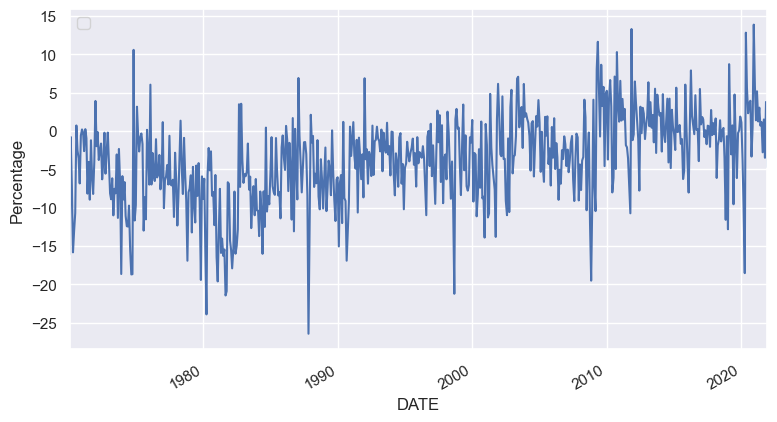

In [87]:
risk_data = df[["risk_premium", "permno", "DATE"]]
#create equal weights
risk_data["eq_weights"] = 1/risk_data.groupby('DATE')['permno'].transform('size')
risk_data['premium_stock_ew'] = risk_data['risk_premium'] * risk_data['eq_weights']
risk_data['returns'] = risk_data.groupby('DATE')['premium_stock_ew'].transform('sum')

risk_data = risk_data[['DATE', 'returns']].drop_duplicates()
risk_data = risk_data.set_index('DATE')

risk_data.plot(grid=True, figsize=(9, 5))
plt.ylabel('Percentage')
plt.xlim(datetime.date(1970,1,31),datetime.date(2021,11,30))
plt.legend('')
plt.savefig('images/risk_premium.png', bbox_inches='tight')


In [ ]:
rcParams['figure.figsize'] = 15, 10
sns.histplot(data = df2, x='mvel1', binrange = (0, 15000000))

In [ ]:
r2oos_ols_ff = pd.read_csv('r2\OLS_FF.csv', index_col = "Unnamed: 0")
r2oos_ols_3 = pd.read_csv('r2\OLS_3.csv', index_col = "Unnamed: 0")
r2oos_ols_7 = pd.read_csv('r2\OLS_7.csv', index_col = "Unnamed: 0")
r2oos_ols_15 = pd.read_csv('r2\OLS_15.csv', index_col = "Unnamed: 0")
r2oos_ols_full = pd.read_csv('r2\OLS_full.csv', index_col = "Unnamed: 0")
r2oos_lr_ff = pd.read_csv('r2\lr-FF.csv', index_col = "Unnamed: 0")
r2oos_lr_3 = pd.read_csv('r2\lr-3.csv', index_col = "Unnamed: 0")
r2oos_lr_7 = pd.read_csv('r2\lr-7.csv', index_col = "Unnamed: 0")
r2oos_lr_15 = pd.read_csv('r2\lr-15.csv', index_col = "Unnamed: 0")
r2oos_lr_full = pd.read_csv('r2\lr_full.csv', index_col = "Unnamed: 0")


In [ ]:
r2oos_ols_ff.reset_index(inplace=True)
r2oos_ols_3.reset_index(inplace=True)
r2oos_ols_7.reset_index(inplace=True)
r2oos_ols_15.reset_index(inplace=True)
r2oos_ols_full.reset_index(inplace=True)
r2oos_lr_ff.reset_index(inplace=True)
r2oos_lr_3.reset_index(inplace=True)
r2oos_lr_7.reset_index(inplace=True)
r2oos_lr_15.reset_index(inplace=True)
r2oos_lr_full.reset_index(inplace=True)

In [ ]:
dfs = [r2oos_ols_ff, r2oos_ols_3, r2oos_ols_7, r2oos_ols_15, r2oos_ols_full,
       r2oos_lr_ff,r2oos_lr_3,r2oos_lr_7,r2oos_lr_15,r2oos_lr_full]

df_r2oos  = reduce(lambda left,right: pd.merge(left,right, on = "index"), dfs)

In [ ]:
df_r2oos

In [ ]:
#Plot results
rcParams['figure.figsize'] = 16, 6
df_melted=df_r2oos.melt(id_vars="index",var_name="Model",value_name="R2OOS")
df_melted = df_melted.rename(columns={'index': 'Sample'})
sns.barplot(x=df_melted["Model"], y= df_melted["R2OOS"], hue= df_melted["Sample"]);

In [ ]:
plt.savefig('images/sample_simple.png', bbox_inches='tight')

In [ ]:
lm_var = pd.read_csv('var_imp_lm.csv')
ols_var = pd.read_csv('var_imp_huber.csv')

In [ ]:
fea_imp_lr = lm_var.sort_values(['var_imp', 'Feature'], ascending=[True, False]).iloc[-10:]
fea_imp_ols = ols_var.sort_values(['var_imp', 'Feature'], ascending=[True, False]).iloc[-10:]
fig, axes = plt.subplots(1, 2)
fea_imp_lr.plot(kind='barh', x='Feature', y='var_imp', figsize=(7, 5), ax=axes[1], legend=None, title='Linear Regression (Full)', ylabel='')
fea_imp_ols.plot(kind='barh', x='Feature', y='var_imp', figsize=(11, 5), ax=axes[0], legend=None, xlabel=None, title='Huber Regression (Full)')
plt.show()

In [ ]:
r2oos_enet = pd.read_csv('r2_complex/r2_ENet_model.csv', index_col = "Unnamed: 0")
r2oos_pcr = pd.read_csv('r2_complex/r2_PCR_model.csv', index_col = "Unnamed: 0")
r2oos_pls = pd.read_csv('r2_complex/r2_PLS_model.csv', index_col = "Unnamed: 0")
r2oos_gbrt = pd.read_csv('r2_complex/r2_GBRT_model.csv', index_col = "Unnamed: 0")
r2oos_nn1 = pd.read_csv('r2_complex/r2_NN1_model.csv', index_col = "Unnamed: 0")
r2oos_nn2 = pd.read_csv('r2_complex/r2_NN2_model.csv', index_col = "Unnamed: 0")
r2oos_nn3 = pd.read_csv('r2_complex/r2_NN3_model.csv', index_col = "Unnamed: 0")
r2oos_nn4 = pd.read_csv('r2_complex/r2_NN4_model.csv', index_col = "Unnamed: 0")
r2oos_nn5 = pd.read_csv('r2_complex/r2_NN5_model.csv', index_col = "Unnamed: 0")

In [ ]:
r2oos_enet.reset_index(inplace=True)
r2oos_pcr.reset_index(inplace=True) 
r2oos_pls.reset_index(inplace=True) 
r2oos_gbrt.reset_index(inplace=True)
r2oos_nn1.reset_index(inplace=True) 
r2oos_nn2.reset_index(inplace=True) 
r2oos_nn3.reset_index(inplace=True) 
r2oos_nn4 .reset_index(inplace=True)
r2oos_nn5.reset_index(inplace=True)

In [ ]:
dfs = [r2oos_enet, r2oos_pcr, r2oos_pls, r2oos_gbrt, r2oos_nn1,r2oos_nn2,r2oos_nn3,r2oos_nn4, r2oos_nn5]

df_r2oos  = reduce(lambda left,right: pd.merge(left,right, on = "index"), dfs)
df_r2oos

In [ ]:
df_r2oos.to_csv('test.csv', index=False)

In [ ]:
#Plot results
rcParams['figure.figsize'] = 16, 4
df_melted=df_r2oos.melt(id_vars="index",var_name="Model",value_name="R2OOS")
df_melted = df_melted.rename(columns={'index': 'Sample'})
sns.barplot(x=df_melted["Model"], y= df_melted["R2OOS"], hue= df_melted["Sample"]);

In [ ]:
comp_enet = pd.read_csv('comp_enet.csv',index_col = "Unnamed: 0", parse_dates=['time'])
comp_gbrt = pd.read_csv('comp_gbrt.csv',index_col = "Unnamed: 0", parse_dates=['time'])
comp_pcr = pd.read_csv('comp_pcr.csv', index_col = "Unnamed: 0", parse_dates=['time'])
comp_pls = pd.read_csv('comp_pls.csv', index_col = "Unnamed: 0", parse_dates=['time'])

In [ ]:
rcParams['figure.figsize'] = 10, 5
fig, axes = plt.subplots(2, 2)
plot1 = sns.lineplot(data=comp_enet, x='time',y='num_coef', ax=axes[0,0])
plot1.set(title='Elastic Net', ylabel='# of coefficients', xlabel='Time')
plot2 = sns.lineplot(data=comp_gbrt, x='time', y='max_depth', ax=axes[0,1])
plot2.set(title='Gradient Boosted Regression Trees', ylabel='Max Depth', xlabel='Time')
plot3 = sns.lineplot(data=comp_pcr, x='time', y='num_comp', ax=axes[1,0])
plot3.set(title='Principal Component Regression', ylabel='# of components', xlabel='Time')
plot4 = sns.lineplot(data=comp_pls, x='time', y='num_comp', ax=axes[1,1])
plot4.set(title='Partial Least Squares', ylabel='# of components', xlabel='Time')
fig.tight_layout()
plt.show()

In [ ]:
var_enet = pd.read_csv('var_imp_net.csv')
var_pca = pd.read_csv('var_imp_pca.csv')
var_pls = pd.read_csv('var_imp_pls.csv')
var_gbrt = pd.read_csv('var_imp_GBRT.csv')

In [ ]:
fea_imp_enet = var_enet.sort_values(['var_imp', 'Feature'], ascending=[True, False]).iloc[-10:]
fea_imp_pca = var_pca.sort_values(['var_imp', 'Feature'], ascending=[True, False]).iloc[-10:]
fea_imp_pls = var_pls.sort_values(['var_imp', 'Feature'], ascending=[True, False]).iloc[-10:]
fea_IMP_gbrt = var_gbrt.sort_values(['var_imp', 'Feature'], ascending=[True, False]).iloc[-10:]
fig, axes = plt.subplots(2, 2)
fea_imp_enet.plot(kind='barh', x='Feature', y='var_imp', figsize=(7, 5), ax=axes[0,1], legend=None, title='Elastic Net', ylabel='')
fea_imp_pca.plot(kind='barh', x='Feature', y='var_imp', figsize=(11, 5), ax=axes[0,0], legend=None, xlabel=None, title='Principal Component Analysis')
fea_imp_pls.plot(kind='barh', x='Feature', y='var_imp', figsize=(11, 5), ax=axes[1,0], legend=None, xlabel=None, title='Partial Least Squares')
fea_IMP_gbrt.plot(kind='barh', x='Feature', y='var_imp', figsize=(11, 5), ax=axes[1,1], legend=None, xlabel=None, title='Gradient Boosted Regression Trees')
fig.tight_layout()

plt.show()

In [48]:
Number_stocks_per_month = Counter(df['DATE'])
Number_stocks_per_month = pd.DataFrame(Number_stocks_per_month.items(), columns=['DATE', 'Numer_of_Stocks'])


In [51]:
alt.Chart(Number_stocks_per_month).mark_line().encode(
    x='DATE:T',
    y=alt.Y('Numer_of_Stocks:Q', title='Number of Stocks (Monthly)'),
    color=alt.value('#A32638')
).properties(
    width=1200,
    height=600,
    title={
 "text": ["","Total Number Publicly Traded Stocks"],
   }
).configure_axis(
    labelFontSize=13,
    titleFontSize=14
).configure_title(
    fontSize=16
)

alt.Chart(...)

In [88]:
risk_data.reset_index(inplace=True)

In [89]:
risk_data['returns'] = risk_data['returns'].apply(lambda x: x/100)

In [90]:
risk_data['avg'] = np.mean(risk_data['returns'])

In [92]:
f = alt.Chart(risk_data).mark_line().encode(
    x=alt.X('DATE:T', title='Date'),
    y=alt.Y('returns', title=''),
    color=alt.value('#A32638')
)

c = alt.Chart(risk_data).mark_line(color='Blue', strokeDash=[5,1]).encode(
    x='DATE:T',
    y='avg:Q'
)

alt.layer(f, c, data=risk_data).properties(
    width=1200,
    height=600,
     title={
      "text": ["","Equity Risk Premium"],
    }
).configure_axis(
    labelFontSize=14,
    titleFontSize=15,
).configure_title(
    fontSize=20
).configure(
    numberFormat='%'
)

alt.LayerChart(...)

In [ ]:
firm_size_2021 = df[df['DATE'] ==) ][['permno', 'mvel1']]

In [ ]:
alt.Chart(firm_size_2021).mark_bar().encode(
    alt.X('mvel1', bin=alt.BinParams(maxbins=100),title='Size (in thousands)', scale=alt.Scale(domain=[0,150000000])),
    alt.Y('count()', ),
    color=alt.value('#A32638')
).properties(
    width=1200,
    height=600
)

In [ ]:
df_r2oss = pd.read_csv('r2oos.csv')

In [ ]:
alt.Chart(df_r2oss).mark_bar().encode(
    x=alt.X('Sample:O', axis=alt.Axis(title=None, labels=False, ticks=False), title='Model'),
    y=alt.Y('R2OOS:Q', axis=alt.Axis(grid=False)),
    color=alt.Color('Sample',
                    scale=alt.Scale(
                        domain=df_r2oss.sort_values(['R2OOS'])['Sample'].tolist(),
                        range=['red', 'black', 'grey']
                    )),
    column=alt.Column('Model:O', header=alt.Header(title=None, labelOrient='bottom'))
).configure_view(
    stroke='transparent'
).properties(
    width=100,
    
    height=600
).configure(
    numberFormat='%'
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
).configure_title(
    fontSize=16
)

In [ ]:
df_r2oss = pd.read_csv('r2oos_complex.csv')

In [ ]:

alt.Chart(df_r2oss).mark_bar().encode(
    x=alt.X('Sample:O', axis=alt.Axis(title=None, labels=False, ticks=False), title='Model'),
    y=alt.Y('R2OOS:Q', axis=alt.Axis(grid=False)),
    color=alt.Color('Sample',
                    scale=alt.Scale(
                        domain=df_r2oss.sort_values(['R2OOS'])['Sample'].tolist(),
                        range=['red', 'black', 'grey']
                    )),
    column=alt.Column('Model:O', header=alt.Header(title=None, labelOrient='bottom'))
).configure_view(
    stroke='transparent'
).properties(
    width=100,
    
    height=600
).configure(
    numberFormat='%'
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
).configure_title(
    fontSize=16
)

In [ ]:

lm_var = pd.read_csv('var_imp_lm.csv')
ols_var = pd.read_csv('var_imp_huber.csv')

In [ ]:
fea_imp_lr = lm_var.sort_values(['var_imp', 'Feature'], ascending=[True, False]).iloc[-20:]
fea_imp_ols = ols_var.sort_values(['var_imp', 'Feature'], ascending=[True, False]).iloc[-20:]

In [ ]:
alt.Chart(fea_imp_lr).mark_bar().encode(
    x=alt.X('var_imp:Q', title='Variable Importance'),
    y=alt.Y('Feature:O').sort('-x'),
    color=alt.value('#A32638')
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
).configure_title(
    fontSize=16
).properties(
    width=600,   
    height=600,
     title={
      "text": ["","Linear Regression"],
    }
)

In [ ]:
alt.Chart(fea_imp_ols).mark_bar().encode(
    x=alt.X('var_imp:Q', title='Variable Importance'),
    y=alt.Y('Feature:O').sort('-x'),
    color=alt.value('#A32638')
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
).configure_title(
    fontSize=16
).properties(
    width=600,   
    height=600,
     title={
      "text": ["","Huber Regression"],
    }
)

In [ ]:
var_enet = pd.read_csv('var_imp_net.csv')
var_pca = pd.read_csv('var_imp_pca.csv')
var_pls = pd.read_csv('var_imp_pls.csv')
var_gbrt = pd.read_csv('var_imp_GBRT.csv')

fea_imp_enet = var_enet.sort_values(['var_imp', 'Feature'], ascending=[True, False]).iloc[-20:]
fea_imp_pca = var_pca.sort_values(['var_imp', 'Feature'], ascending=[True, False]).iloc[-20:]
fea_imp_pls = var_pls.sort_values(['var_imp', 'Feature'], ascending=[True, False]).iloc[-20:]
fea_IMP_gbrt = var_gbrt.sort_values(['var_imp', 'Feature'], ascending=[True, False]).iloc[-20:]

In [ ]:
alt.Chart(fea_IMP_gbrt).mark_bar().encode(
    x=alt.X('var_imp:Q', title='Variable Importance'),
    y=alt.Y('Feature:O').sort('-x'),
    color=alt.value('#A32638')
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
).configure_title(
    fontSize=16
).properties(
    width=150,   
    height=400,
     title={
      "text": ["","Gradian Boosted Regression Trees"],
    }
)

In [ ]:
alt.Chart(fea_imp_pls).mark_bar().encode(
    x=alt.X('var_imp:Q', title='Variable Importance'),
    y=alt.Y('Feature:O').sort('-x'),
    color=alt.value('#A32638')
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
).configure_title(
    fontSize=16
).properties(
    width=200,   
    height=400,
     title={
      "text": ["","Partial Least Squares"],
    }
)

In [ ]:
alt.Chart(fea_imp_pca).mark_bar().encode(
    x=alt.X('var_imp:Q', title='Variable Importance'),
    y=alt.Y('Feature:O').sort('-x'),
    color=alt.value('#A32638')
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
).configure_title(
    fontSize=16
).properties(
    width=150,   
    height=400,
     title={
      "text": ["","Principal Component Regression"],
    }
)

In [ ]:
alt.Chart(fea_imp_enet).mark_bar().encode(
    x=alt.X('var_imp:Q', title='Variable Importance'),
    y=alt.Y('Feature:O').sort('-x'),
    color=alt.value('#A32638')
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
).configure_title(
    fontSize=16
).properties(
    width=200,   
    height=400,
     title={
      "text": ["","Elastic Net"],
    }
)

In [ ]:

comp_enet = pd.read_csv('comp_enet.csv',index_col = "Unnamed: 0", parse_dates=['time'])
comp_gbrt = pd.read_csv('comp_gbrt.csv',index_col = "Unnamed: 0", parse_dates=['time'])
comp_pcr = pd.read_csv('comp_pcr.csv', index_col = "Unnamed: 0", parse_dates=['time'])
comp_pls = pd.read_csv('comp_pls.csv', index_col = "Unnamed: 0", parse_dates=['time'])

In [ ]:
alt.Chart(comp_enet).mark_line().encode(
    x=alt.X('time:T', title='Time'),
    y=alt.Y('num_coef:Q', title='Number of Coefficients'),
    color=alt.value('#A32638')
).properties(
    width=400,
    height=200,
     title={
      "text": ["","Elastic Net"],
     }
).configure_axis(
    labelFontSize=13,
    titleFontSize=12
)

In [ ]:
alt.Chart(comp_gbrt).mark_line().encode(
    x=alt.X('time:T', title='Time'),
    y=alt.Y('max_depth:Q', title='Max Depth', scale=alt.Scale(domain=[1,2])),
    color=alt.value('#A32638')
).properties(
    width=400,
    height=200,
     title={
      "text": ["","Gradient Boosted Regression Trees"],
     }
).configure_axis(
    labelFontSize=13,
    titleFontSize=12
)

In [ ]:
alt.Chart(comp_pcr).mark_line().encode(
    x=alt.X('time:T', title='Time'),
    y=alt.Y('num_comp:Q', title='# of Components'),
    color=alt.value('#A32638')
).properties(
    width=400,
    height=200,
     title={
      "text": ["","Principal Component Regression"],
     }
).configure_axis(
    labelFontSize=13,
    titleFontSize=12
)

In [ ]:
alt.Chart(comp_pls).mark_line().encode(
    x=alt.X('time:T', title='Time'),
    y=alt.Y('num_comp:Q', title='# of components'),
    color=alt.value('#A32638')
).properties(
    width=400,
    height=200,
     title={
      "text": ["","Partial Least Squares"],
     }
).configure_axis(
    labelFontSize=13,
    titleFontSize=12
)

In [ ]:
var_pca

Text(0.5, 1.0, 'Correlation Heatmap')

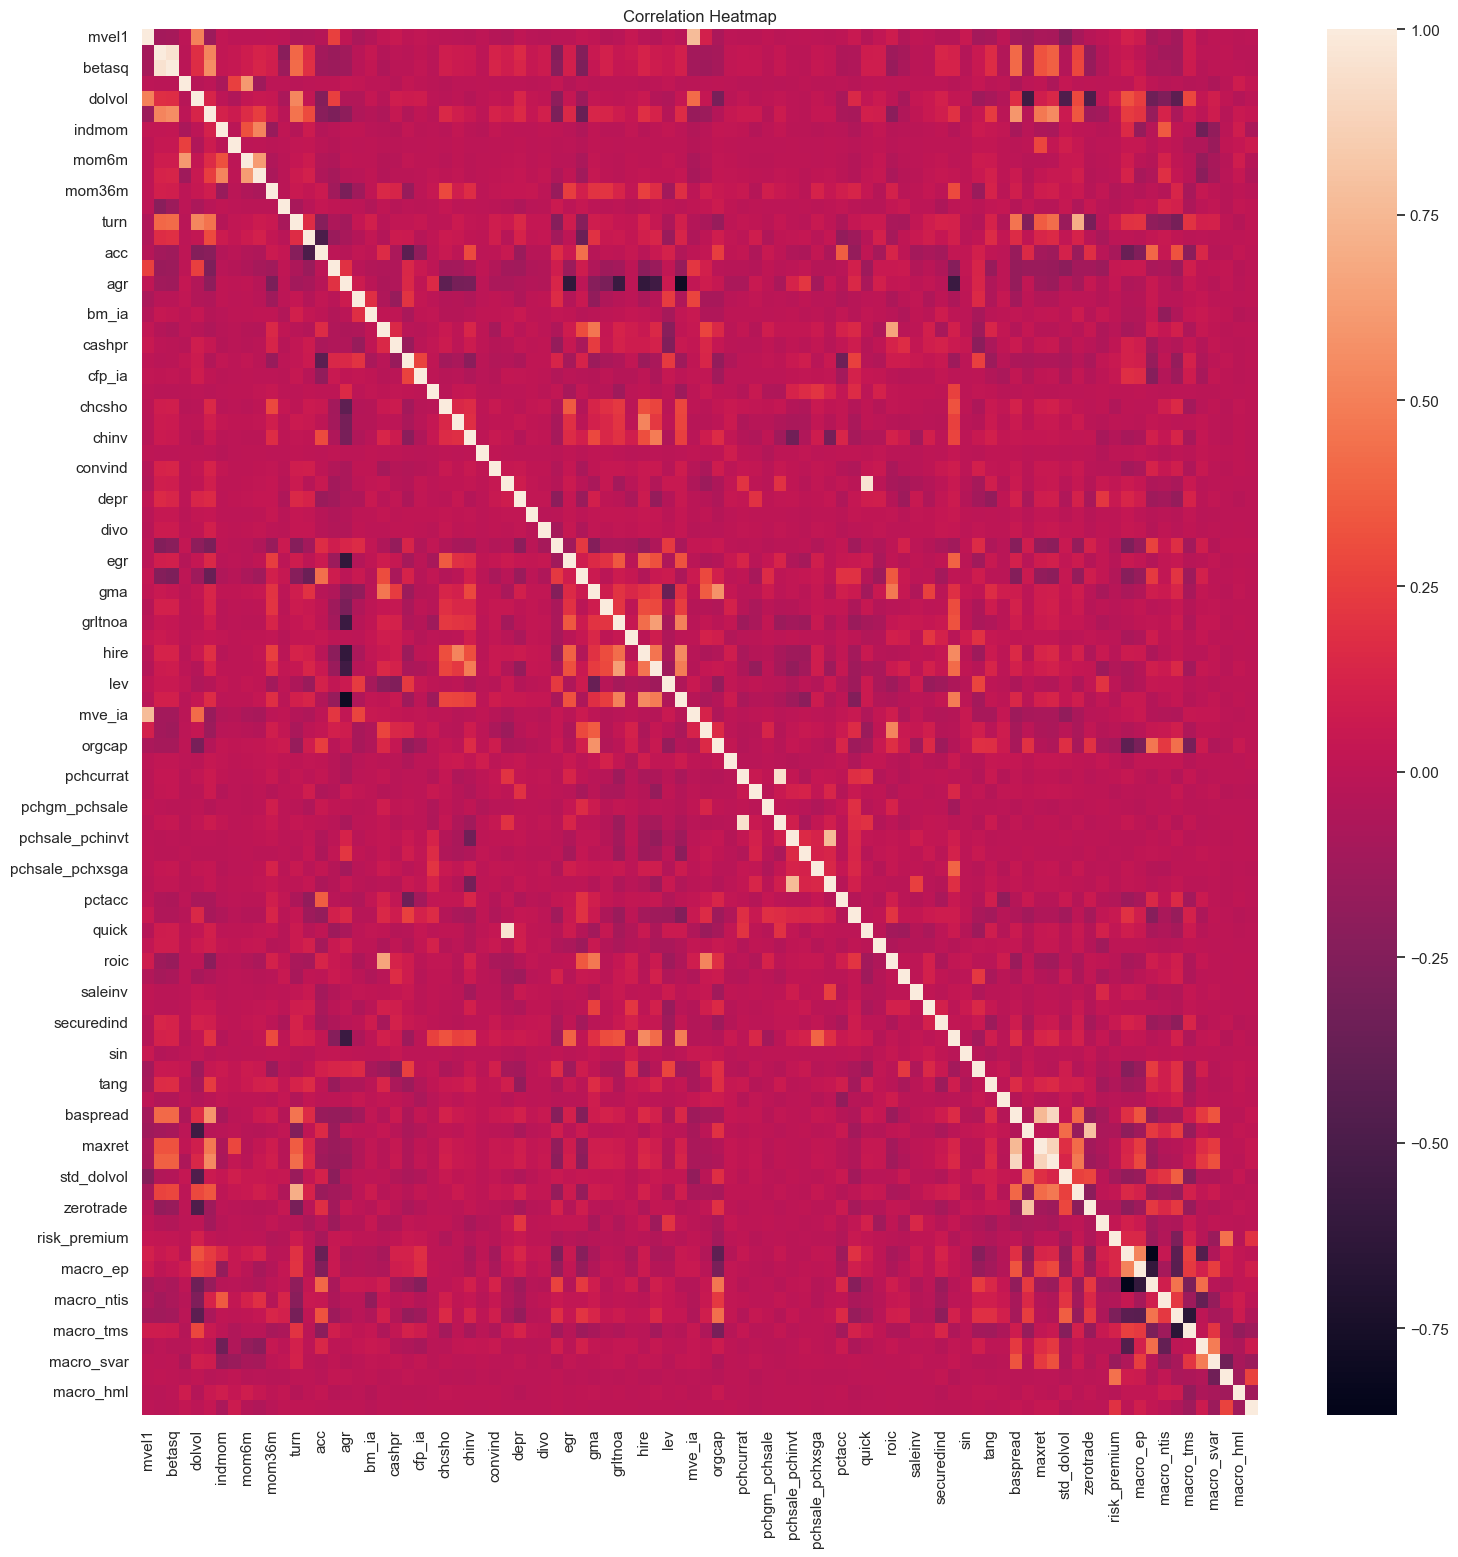

In [101]:
features = df.columns[~df.columns.isin(['permno', 'DATE'])].tolist()
plt.figure(figsize=(18,18))
sns.heatmap(df[features].corr())
plt.title('Correlation Heatmap')
# plt.savefig('images/correlation_matrix.png', bbox_inches='tight')

In [102]:
c = df[features].corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort").reset_index()
so.columns = ['Variable 1','Variable 2', 'corr']
so = so.sort_values(by = ['corr', 'Variable 1'], ascending = False)
so = so[so['corr']!=1]
so = so.iloc[::2].reset_index(drop=True)

In [103]:
correlation = df.corr()["risk_premium"].abs().sort_values(ascending = False)
corr_df = pd.DataFrame(correlation)

In [104]:
corr_df.drop(index=['risk_premium' , 'DATE', 'macro_mkt-rf', 'permno', 'macro_smb'], inplace=True)

In [105]:
corr_df.reset_index(inplace=True)
corr_df.rename(columns={'index':'Feature', 'risk_premium':'Correlation'},inplace=True)

In [106]:
worse = corr_df.sort_values(['Correlation', 'Feature'], ascending=[True, False]).iloc[:20]

In [107]:
best = corr_df.sort_values(['Correlation', 'Feature'], ascending=[True, False]).iloc[-20:]

In [108]:
alt.Chart(best).mark_bar().encode(
    x=alt.X('Correlation:Q', title='Correlation'),
    y=alt.Y('Feature:O').sort('-x'),
    color=alt.value('#A32638')
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
).configure_title(
    fontSize=16
).properties(
    width=300,   
    height=400,
     title={
      "text": ["","Features Most Correlated With risk_premium"],
    }
)

alt.Chart(...)

In [46]:
alt.Chart(worse).mark_bar().encode(
    x=alt.X('Correlation:Q', title='Correlation'),
    y=alt.Y('Feature:O').sort('-x'),
    color=alt.value('#A32638')
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
).configure_title(
    fontSize=16
).properties(
    width=300,   
    height=400,
     title={
      "text": ["","Features Least Correlated With risk_premium"],
    }
)

alt.Chart(...)